## Loading and paths

In [1]:
pacman::p_load(Seurat, here, "glmGamPoi")

In [2]:
here::here()
data_path <- here("Module_2", "S14", "01_data")
dataset <- Load10X_Spatial(data.dir = data_path, 
                            filename = "CytAssist_11mm_FFPE_Human_Lung_Cancer_filtered_feature_bc_matrix.h5")

[1] "/home/op/Projects/2025Q1-DAAD-sc-spatial"

## Seurat analysis

In [3]:
# dataset <- SCTransform(dataset, assay = "Spatial", verbose = TRUE,
#                         ncells = 3000, variable.features.n3 = 1500)

dataset <- NormalizeData(dataset, assay = "Spatial", 
                        normalization.method = "LogNormalize", 
                        scale.factor = 10000)

Normalizing layer: counts



In [4]:
dataset <- FindVariableFeatures(dataset)
dataset <- ScaleData(dataset)

Finding variable features for layer counts

Centering and scaling data matrix



In [5]:
#SpatialFeaturePlot(dataset, features = c(...))

In [ ]:
dataset <- RunPCA(dataset, assay = "Spatial", verbose = FALSE)
dataset <- FindNeighbors(dataset, reduction = "pca", dims = 1:30)
dataset <- FindClusters(dataset, verbose = FALSE)
dataset <- RunUMAP(dataset, reduction = "pca", dims = 1:30)

Computing nearest neighbor graph

Computing SNN

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
19:12:22 UMAP embedding parameters a = 0.9922 b = 1.112

19:12:22 Read 6195 rows and found 30 numeric columns

19:12:22 Using Annoy for neighbor search, n_neighbors = 30

19:12:22 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

19:12:22 Writing NN index file to temp file /tmp/Rtmp7nqivZ/file1f70a53cec833

19:12:22 Searching Annoy index using 1 thread, search_k = 3000

19:12:23 Annoy recall = 100%

19:12:24 Commencing smooth kNN distance cal

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


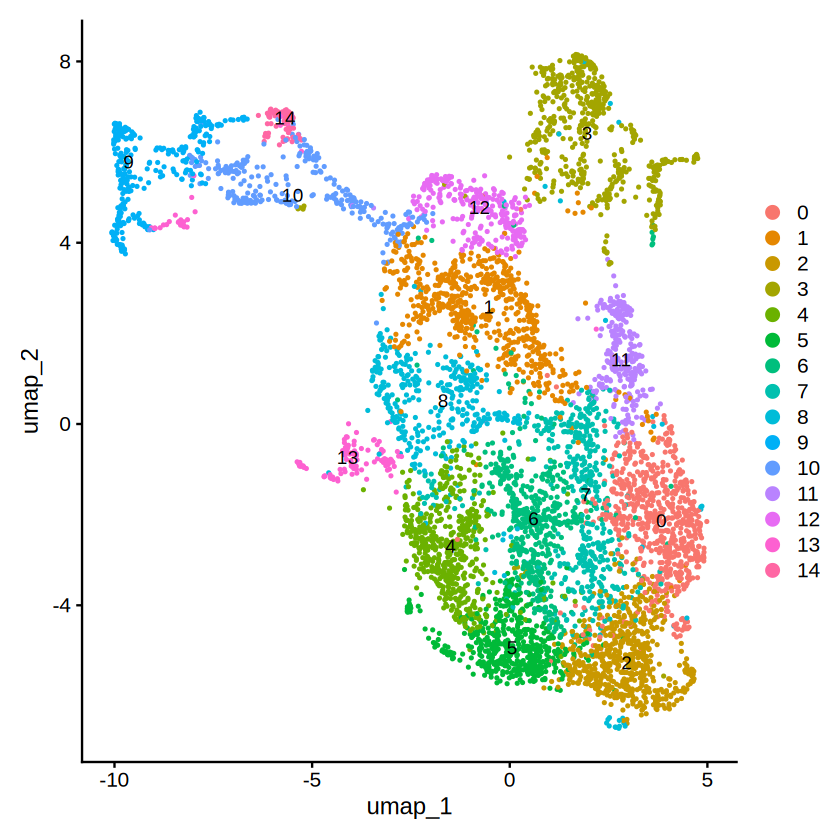

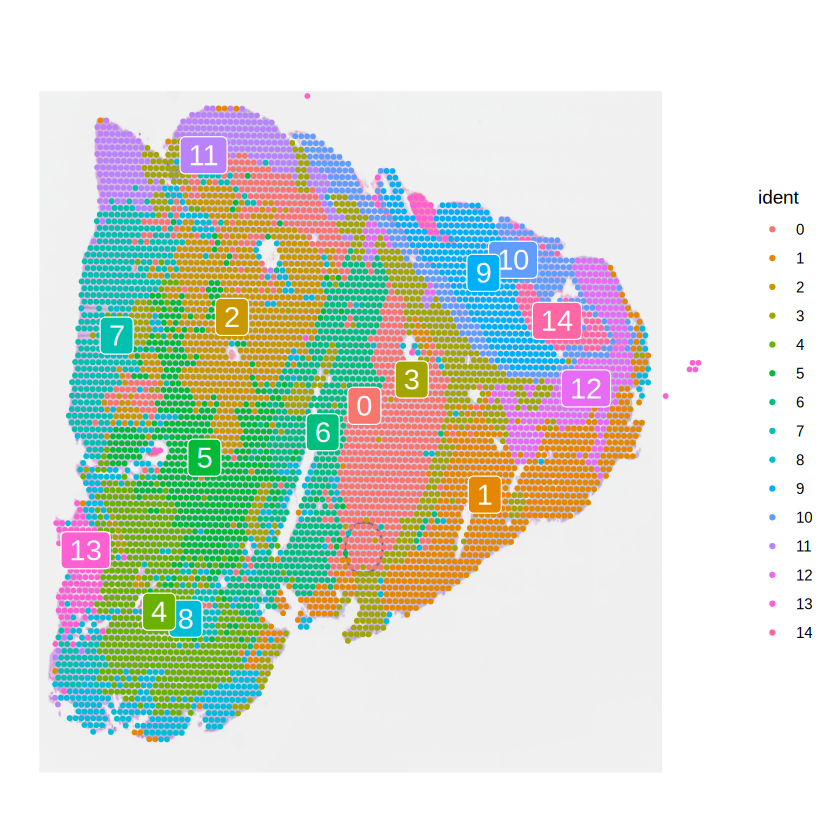

In [6]:
DimPlot(dataset, reduction = "umap", label = TRUE)
SpatialDimPlot(dataset, label = TRUE, label.size = 6, label.box = TRUE)


Warning message:
“The following requested variables were not found: HER2, ERBB1, RB2”


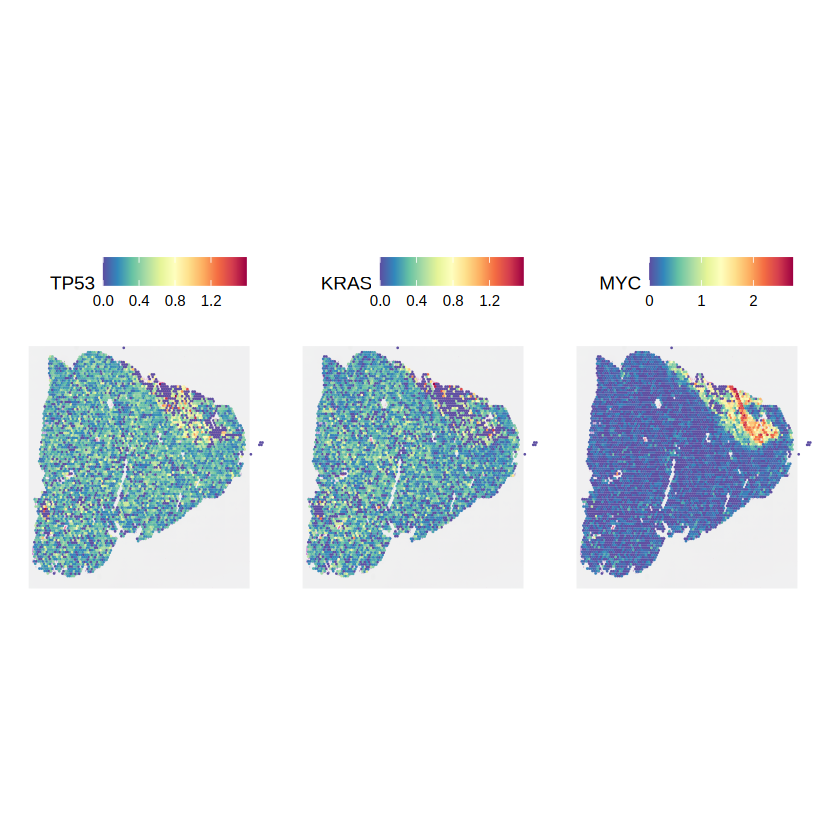

In [8]:
SpatialFeaturePlot(dataset, features = c("HER2", "ERBB1", "TP53", "KRAS", "MYC", "RB2"))

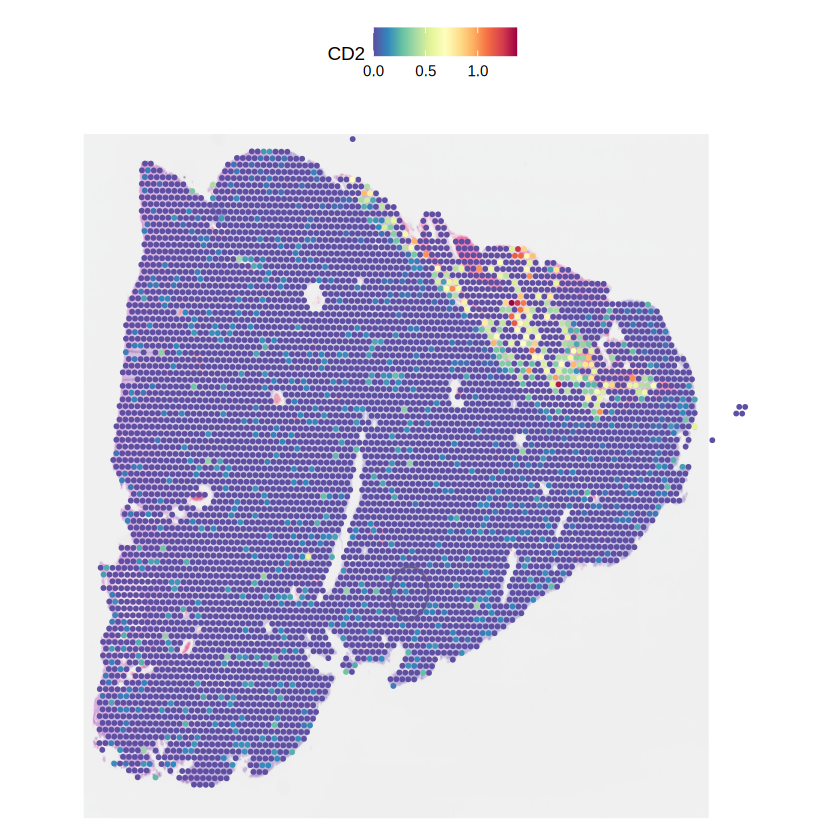

In [9]:
SpatialFeaturePlot(dataset, features = c("CD2"))

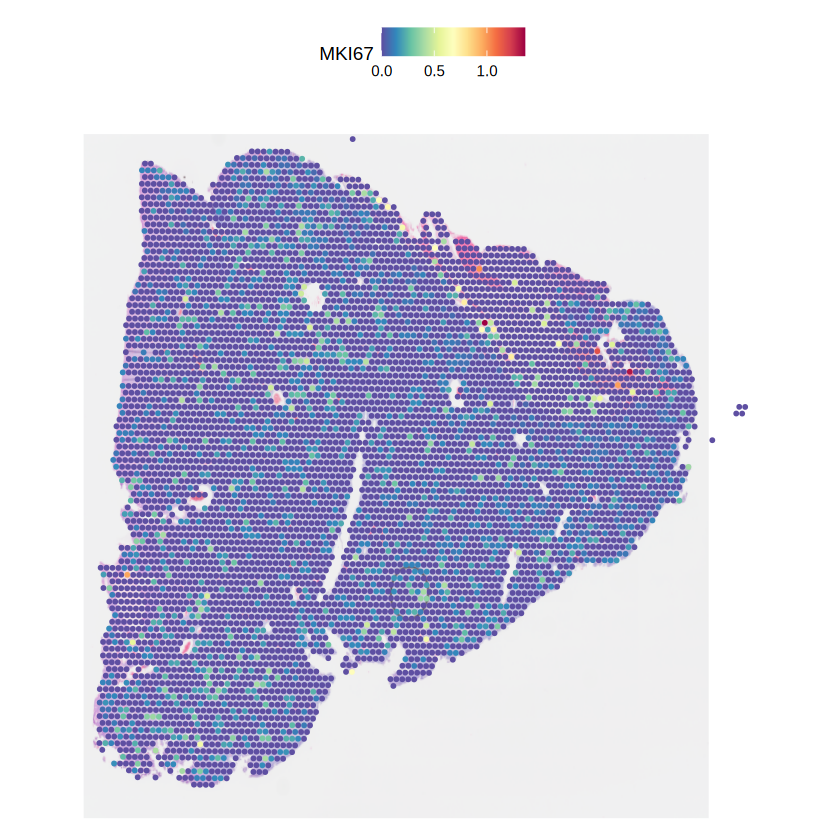

In [12]:
SpatialFeaturePlot(dataset, features = c("MKI67"))

In [7]:
markers <- FindAllMarkers(dataset, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)

Calculating cluster 0

For a (much!) faster implementation of the Wilcoxon Rank Sum Test,
(default method for FindMarkers) please install the presto package
--------------------------------------------
install.packages('devtools')
devtools::install_github('immunogenomics/presto')
--------------------------------------------
After installation of presto, Seurat will automatically use the more 
efficient implementation (no further action necessary).
This message will be shown once per session

Calculating cluster 1



## Outputs

In [10]:
dataset_sce <- as.SingleCellExperiment(dataset)

In [11]:
dataset_sce

class: SingleCellExperiment 
dim: 18085 6195 
metadata(0):
assays(2): counts logcounts
rownames(18085): SAMD11 NOC2L ... MT-ND6 MT-CYB
rowData names(0):
colnames(6195): AACAATCCGAGTGGAC-1 AACAATGGAACCACAT-1 ...
  TGTTGGTGCGGAATCA-1 TGTTGGTGGACTCAGG-1
colData names(6): orig.ident nCount_Spatial ... seurat_clusters ident
reducedDimNames(2): PCA UMAP
mainExpName: Spatial
altExpNames(0):

In [ ]:
saveRDS(dataset, file = here("Module_2", "S14", "03_outputs", "dataset.rds"))
saveRDS(dataset_sce, file = here("Module_2", "S14", "03_outputs", "dataset_sce.rds"))